In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np


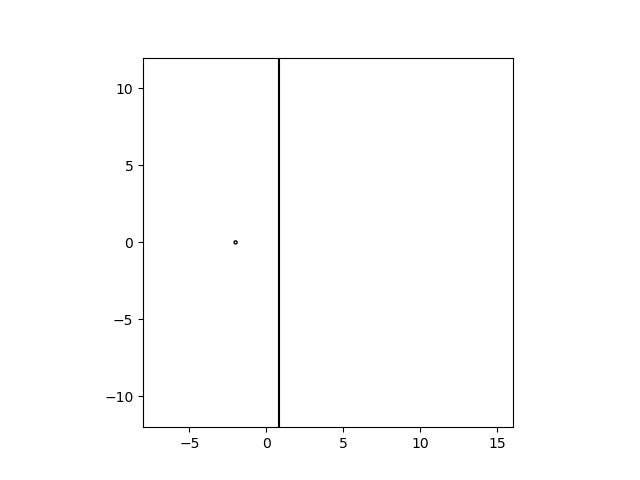

In [7]:
%matplotlib widget
# Parameters for the animation
radius = 0.1 # Initial radius of the circle
dr = 0.03 # Increment of radius per frame
x0, y0 = -2, 0 # Center of the circle
x1 = 0.8 # Position of the vertical line
n = 50 # Number of new circles to create
frames = 300

# Create a figure and an axis
fig, ax = plt.subplots()
ax.set_xlim(-2*4, 4*4)
ax.set_ylim(-2*6, 2*6)
ax.set_aspect('equal')
#ax.set_title()

# Create the initial circle and the vertical line
circle = plt.Circle((x0, y0), radius, fill=False)
line = plt.axvline(x1, color='k')
ax.add_patch(circle)

# Create a list to store the new circles
new_circles = []

# Define a function to update the animation
def update(frame):
    global radius, new_circles
    # Increase the radius of the circle
    radius += dr
    circle.set_radius(radius)
    # Check if the circle touches the line
    if x0 + radius >= x1:
        # Create a new circle at the point of contact
        if frame % int(frames/n) == 0:
            
            #Up and down circles.
            new_circle1 = plt.Circle((x1, y0 + np.sqrt(radius**2 - (x1 - x0)**2)), 0, fill=False, color="red")
            new_circle2 = plt.Circle((x1, y0 - np.sqrt(radius**2 - (x1 - x0)**2)), 0, fill=False, color="red")
            
            ax.add_patch(new_circle1)
            ax.add_patch(new_circle2)

            new_circles.append(new_circle1)
            new_circles.append(new_circle2)
    # Update the radius of the new circles
    for c in new_circles:
        c.set_radius(c.get_radius() + dr*1/2) #Decreasing of increasing rate of radius by the different media.
    return circle, line, *new_circles

# Create an animation object
ani = animation.FuncAnimation(fig, update, frames=range(frames*2), interval=50, blit=True)

# Show the animation
plt.show()


In [8]:
writervideo = animation.FFMpegWriter (fps=60)

# Guardar la animación como mp4
ani.save ('animation.mp4', writer=writervideo)